In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

import datetime as dt
import warnings; warnings.simplefilter('ignore')

In [2]:
cols=['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 
       'fare_amount', 'extra',
       'mta_tax','tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge']

In [57]:
path = "D:\YT Data"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, usecols=cols,header=0,low_memory=False)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

In [4]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,6.0,3.0,0.5,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,7.0,3.0,0.5,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,6.0,3.0,0.5,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,5.5,0.5,0.5,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,3.5,0.5,0.5,0.0,0.3,4.80,0.0


In [6]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1.678994e+07,1.678994e+07,1.720422e+07,1.678994e+07,1.720422e+07,1.720422e+07,1.720422e+07,1.720422e+07,1.720422e+07,1.720422e+07,1.720422e+07
mean,1.665646e+00,1.460441e+00,3.223973e+00,1.047113e+00,1.250861e+01,1.053171e+00,4.927074e-01,2.861866e-01,2.974735e-01,1.817620e+01,2.222489e+00
std,4.717643e-01,1.106150e+00,2.287248e+02,7.781155e-01,3.279765e+02,1.242467e+00,7.511922e-02,1.549604e+00,3.807391e-02,3.280677e+02,8.096555e-01
min,1.000000e+00,0.000000e+00,-3.062000e+01,1.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-4.000000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.800000e-01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,3.000000e-01,1.115000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.640000e+00,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,3.000000e-01,1.416000e+01,2.500000e+00
75%,2.000000e+00,1.000000e+00,2.970000e+00,1.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,0.000000e+00,3.000000e-01,1.956000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,2.970045e+05,9.900000e+01,9.983100e+05,1.130100e+02,3.080000e+01,9.105000e+02,3.000000e-01,9.983256e+05,3.000000e+00


In [59]:
data['trip_distance'].describe()

count    1.720422e+07
mean     3.223973e+00
std      2.287248e+02
min     -3.062000e+01
25%      9.800000e-01
50%      1.640000e+00
75%      2.970000e+00
max      2.970045e+05
Name: trip_distance, dtype: float64

In [60]:
data['trip_distance'].median()

1.64

In [61]:
data['fare_amount'].describe()

count    1.720422e+07
mean     1.250861e+01
std      3.279765e+02
min     -1.238000e+03
25%      6.500000e+00
50%      9.000000e+00
75%      1.350000e+01
max      9.983100e+05
Name: fare_amount, dtype: float64

In [8]:
data.index

RangeIndex(start=0, stop=17204222, step=1)

In [16]:
data.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [9]:
data[data["VendorID"].isnull()==True]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6339567,NaN,2020-01-01 08:51:00,2020-01-01 09:19:00,NaN,13.69,NaN,51.05,2.75,0.5,0.0,0.3,54.60,0.0
6339568,NaN,2020-01-01 08:38:43,2020-01-01 08:51:08,NaN,3.42,NaN,27.06,2.75,0.0,0.0,0.3,30.11,0.0
6339569,NaN,2020-01-01 08:27:00,2020-01-01 08:32:00,NaN,2.20,NaN,24.36,2.75,0.5,0.0,0.3,27.91,0.0
6339570,NaN,2020-01-01 08:46:00,2020-01-01 08:57:00,NaN,0.84,NaN,26.08,2.75,0.5,0.0,0.3,29.63,0.0
6339571,NaN,2020-01-01 08:21:00,2020-01-01 08:38:00,NaN,7.24,NaN,25.28,2.75,0.5,0.0,0.3,28.83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13653154,NaN,2020-09-10 10:09:50,2020-09-10 11:09:34,NaN,8.57,NaN,28.38,0.00,0.5,0.0,0.3,29.18,0.0
13653155,NaN,2020-09-10 10:09:32,2020-09-10 10:09:16,NaN,4.45,NaN,28.20,0.00,0.5,0.0,0.3,29.00,0.0
13653156,NaN,2020-09-10 10:04:09,2020-09-10 10:48:54,NaN,12.32,NaN,57.53,0.00,0.5,0.0,0.3,61.08,0.0
13653157,NaN,2020-09-10 10:51:00,2020-09-10 11:00:00,NaN,2.23,NaN,18.45,0.00,0.5,0.0,0.3,22.00,0.0


In [8]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'fare_amount',
       'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [10]:
data[['trip_distance',
       'fare_amount', 'extra',
       'mta_tax','tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge']] = data[['trip_distance',
       'fare_amount', 'extra',
       'mta_tax','tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge']].apply(pd.to_numeric, downcast="float")

In [11]:
data[['VendorID','passenger_count','RatecodeID']]=data[['VendorID','passenger_count','RatecodeID']].fillna(0.0).astype(int).apply(pd.to_numeric, downcast="unsigned")

In [12]:
data.dtypes

VendorID                   uint8
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            uint8
trip_distance            float32
RatecodeID                 uint8
fare_amount              float32
extra                    float32
mta_tax                  float32
tolls_amount             float32
improvement_surcharge    float32
total_amount             float32
congestion_surcharge     float32
dtype: object

In [41]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.2,1,6.0,3.0,0.5,0.0,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.2,1,7.0,3.0,0.5,0.0,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.6,1,6.0,3.0,0.5,0.0,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.8,1,5.5,0.5,0.5,0.0,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.0,1,3.5,0.5,0.5,0.0,0.3,4.80,0.0


In [13]:
data['tpep_pickup_datetime']=pd.to_datetime(data['tpep_pickup_datetime'],format='%Y-%m-%d %H:%M:%S')

In [14]:
data[data['tpep_dropoff_datetime'].isnull()==True]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
15964280,2,NaT,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17204221,1,2020-01-01,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data=data[data['tpep_dropoff_datetime'].isnull()==False]

In [16]:
data=data[data['tpep_dropoff_datetime']!='2020-08-27 04:']

In [17]:
data['tpep_dropoff_datetime']=pd.to_datetime(data['tpep_dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')

In [18]:
data=data[data['tpep_dropoff_datetime'].isnull()==False]

In [19]:
data=data[data['tpep_pickup_datetime'].isnull()==False]

In [20]:
data["trip_distance"]

0           1.20
1           1.20
2           0.60
3           0.80
4           0.00
            ... 
17204216    0.94
17204217    1.75
17204218    1.97
17204219    4.21
17204220    2.19
Name: trip_distance, Length: 17204219, dtype: float32

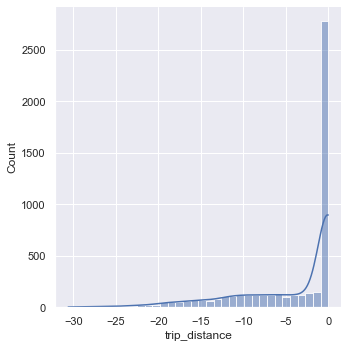

In [32]:
sns.displot(data=nd[:5000], kde=True)

In [25]:
nd=data['trip_distance'].sort_values()

In [26]:
nd

6355621        -30.620001
6355622        -30.620001
6377455        -29.469999
6341351        -29.230000
6359044        -29.100000
                ...      
13605077    239679.015625
11306338    256069.125000
9901516     297004.500000
7835232               NaN
14738273              NaN
Name: trip_distance, Length: 17204219, dtype: float32

In [34]:
index = data.index
number_of_rows = len(index)

import math
to_delete=math.floor(0.005*number_of_rows)

In [54]:
data['trip_distance'].sort_values(ascending=False)[:to_delete]

9901516     297004.500000
11306338    256069.125000
13605077    239679.015625
11290506    231147.484375
11273401    222795.312500
                ...      
8663568         20.610001
9889078         20.610001
15772737        20.610001
4800803         20.610001
8435089         20.610001
Name: trip_distance, Length: 86021, dtype: float32

In [35]:
delete_index=np.concatenate((data['trip_distance'].sort_values(ascending=True)[:to_delete].index,data['trip_distance'].sort_values(ascending=False)[:to_delete].index))

In [36]:
data=data[data['fare_amount']>0]

In [37]:
data=data[data['fare_amount']<1200]

In [38]:
data=data[data['trip_distance']>0]

In [39]:
data['pickup_day']=data['tpep_pickup_datetime'].dt.day_name()
data['dropoff_day']=data['tpep_dropoff_datetime'].dt.day_name()
data['pickup_hour']=data['tpep_pickup_datetime'].dt.hour
data['dropoff_hour']=data['tpep_dropoff_datetime'].dt.hour
data['pickup_month']=data['tpep_pickup_datetime'].dt.month_name()

In [40]:
data['trip_duration']=(data['tpep_dropoff_datetime']-data['tpep_pickup_datetime'])/np.timedelta64(1, 'm')

In [41]:
data['trip_duration']=pd.to_numeric(data['trip_duration'], downcast='float')

In [42]:
data=data[data["trip_duration"]>0]

In [63]:
data=data[data["trip_duration"]<1500]

In [43]:
data=data[data["RatecodeID"]!=99.0]

In [50]:
months=['January','February','March','April','May','June','July','August','September','October','November','December']

<AxesSubplot:xlabel='count', ylabel='pickup_month'>

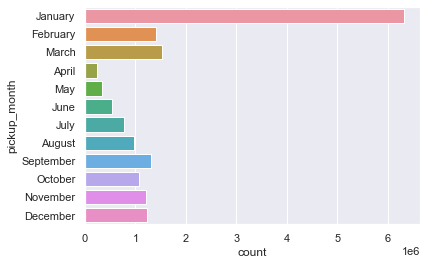

In [55]:
sns.countplot(y="pickup_month",data=data, order=months,orient='v')

<AxesSubplot:xlabel='trip_duration', ylabel='fare_amount'>

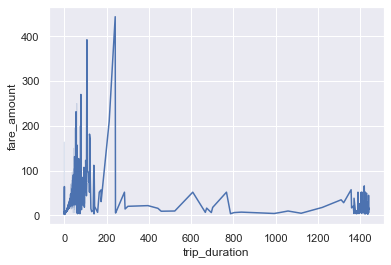

In [81]:
sns.lineplot(y='fare_amount',x='trip_duration', data=data[::137])

<AxesSubplot:xlabel='trip_duration', ylabel='fare_amount'>

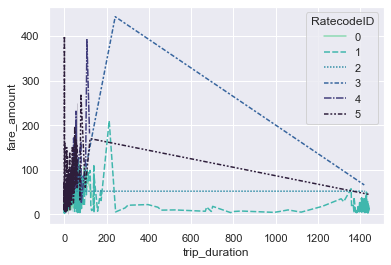

In [65]:
sns.lineplot(y='fare_amount',x='trip_duration',data=data[::137],hue="RatecodeID",style="RatecodeID",palette=sns.color_palette("mako_r", 6))

In [83]:
df=data[data['trip_duration']<200]

<AxesSubplot:xlabel='trip_duration', ylabel='fare_amount'>

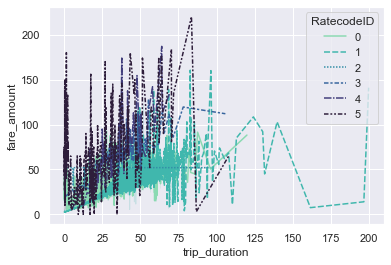

In [84]:
sns.lineplot(y='fare_amount',x='trip_duration',data=df[::137],hue="RatecodeID",style="RatecodeID",palette=sns.color_palette("mako_r", 6))

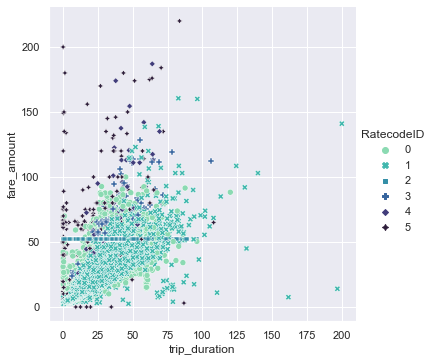

In [87]:
sns.relplot(
    data=df[::137],
    x="trip_duration", y="fare_amount",
    hue="RatecodeID", style="RatecodeID", palette=sns.color_palette("mako_r", 6))


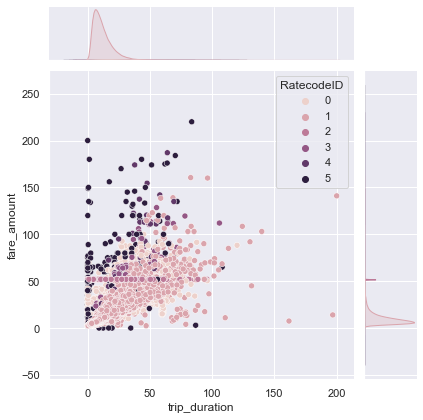

In [89]:
sns.jointplot(data=df[::137],  x="trip_duration", y="fare_amount", hue="RatecodeID")

In [91]:
data[data['RatecodeID']==6]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_month,trip_duration
384747,2,2020-01-03 11:31:53,2020-01-03 11:34:38,1,0.230000,6,5.5,0.0,0.5,0.00,0.3,7.050000,0.75,Friday,Friday,11,11,January,2.750000
435934,2,2020-01-03 16:37:10,2020-01-03 16:40:14,1,0.180000,6,2.5,0.0,0.5,0.00,0.3,4.050000,0.75,Friday,Friday,16,16,January,3.066667
477753,1,2020-01-03 20:11:52,2020-01-03 20:13:27,1,0.100000,6,2.5,0.0,0.5,0.00,0.3,3.300000,0.00,Friday,Friday,20,20,January,1.583333
916474,1,2020-01-06 12:42:39,2020-01-06 12:43:10,1,0.100000,6,2.5,0.0,0.5,0.00,0.3,3.300000,0.00,Monday,Monday,12,12,January,0.516667
1222336,1,2020-01-07 23:56:03,2020-01-07 23:56:26,0,7.100000,6,3.5,0.0,0.5,0.00,0.3,4.300000,0.00,Tuesday,Tuesday,23,23,January,0.383333
1525874,1,2020-01-09 13:54:17,2020-01-09 13:57:30,1,1.000000,6,3.5,0.0,0.5,0.00,0.3,4.300000,0.00,Thursday,Thursday,13,13,January,3.216667
1724632,1,2020-01-10 10:48:00,2020-01-10 10:48:33,1,1.100000,6,2.5,0.0,0.5,0.00,0.3,3.300000,0.00,Friday,Friday,10,10,January,0.550000
2803024,1,2020-01-15 13:24:21,2020-01-15 13:27:55,1,0.400000,6,2.5,0.0,0.5,0.00,0.3,5.800000,0.00,Wednesday,Wednesday,13,13,January,3.566667
3596742,1,2020-01-18 23:44:14,2020-01-18 23:45:25,1,0.500000,6,2.5,0.0,0.5,0.00,0.3,3.300000,0.00,Saturday,Saturday,23,23,January,1.183333
5352052,2,2020-01-27 15:59:57,2020-01-27 16:00:11,1,0.060000,6,2.5,0.0,0.5,0.00,0.3,4.050000,0.75,Monday,Monday,15,16,January,0.233333


<AxesSubplot:xlabel='pickup_hour', ylabel='fare_amount'>

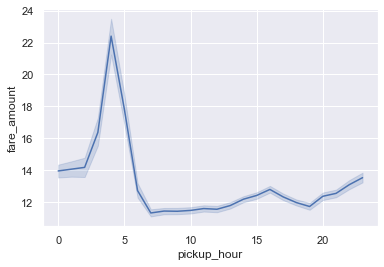

In [68]:
sns.lineplot(y='fare_amount',x='pickup_hour',data=data[::100])

<AxesSubplot:xlabel='RatecodeID', ylabel='fare_amount'>

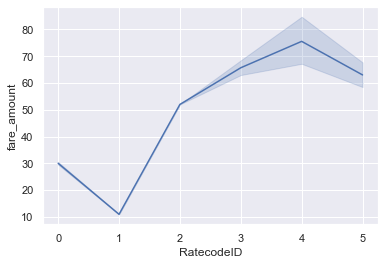

In [69]:
sns.lineplot(y='fare_amount',x='RatecodeID',data=data[::100])

<AxesSubplot:xlabel='RatecodeID', ylabel='fare_amount'>

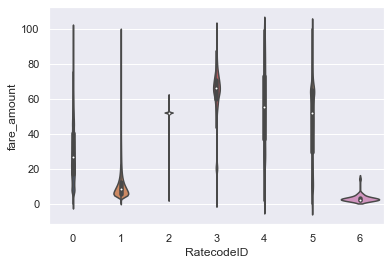

In [77]:
sns.violinplot(x="RatecodeID", y="fare_amount", data=data[data['fare_amount']<100])

In [ ]:
sns.lineplot(y='fare_amount',x='pickup_hour',data=data[::100])